In [29]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lendo imagens com OpenCV

Vamos ler a imagem usando OpenCV:

In [30]:
img = cv2.imread('arco_iris.png')

Observe o tipo da imagem:

In [31]:
type(img)

numpy.ndarray

Trata-se de um array do Numpy. Vamos ver a resolução da imagem:

In [32]:
img.shape

(434, 871, 3)

Note que temos uma estrutura tridimensional. As primeiras duas dimensões correspondem ao número de linhas e colunas da imagem. A terceira dimensão corresponde às dimensões de cores. Vamos visualizar a imagem colorida e as suas componentes em separado.

In [33]:
cv2.imshow('Completa', img)
for i in range(3):
    cv2.imshow('Componente {}'.format(i), img[:, :, i])
cv2.waitKey()
cv2.destroyAllWindows()

**Atividade:** Qual cor corresponde a cada componente?

**Resposta:** A dimensão zero corresponte a cor azul, a dimensão 1 a cor verde e a dimensão 2 a cor vermelha.

OpenCV segue uma convenção pouco usual: a primeira componente corresponde à cor azul, a segunda à cor verde, e a terceira à cor vermelha. É o oposto da convenção da maioriados pacotes de processamento de imagens, e também ao Matplotlib. Observe o que acontece se tentamos mostrar a imagem diretamente com matplotlib:

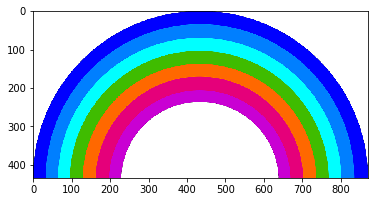

In [34]:
plt.imshow(img)

Para exibir corretamente a imagem usando matplotlib temos que inverter a ordem dos planos de cores:

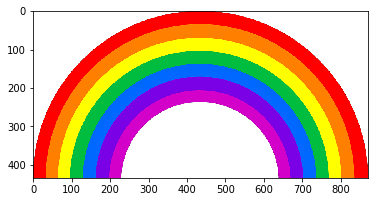

In [35]:
plt.imshow(img[:, :, ::-1])  # Invertendo a ordem das componentes de cor.

# Modelo de cores HSV

Vamos converter a imagem de BGR para HSV

In [36]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [37]:
cv2.imshow('Completa', img)
for i in range(3):
    cv2.imshow('Componente {}'.format(i), hsv[:, :, i])
cv2.waitKey()
cv2.destroyAllWindows()

Podemos usar a função ``cvtColor()`` para explorar a conversão de cores:

In [38]:
cor_BGR = np.uint8([[[0,255,0]]])  # verde
cor_HSV = cv2.cvtColor(cor_BGR, cv2.COLOR_BGR2HSV)
print(cor_HSV)

[[[ 60 255 255]]]


**Atividade:** Usando numpy, faça o seguinte:

- "Esbranqueça" a imagem: faça com que todas as cores fiquem mais suaves

In [ ]:
def modify_saturation(npArray):
    print(npArray[1])
    newSaturation =  npArray[1] * (0.4)
    print(newSaturation)
    newSaturation = np.round(newSaturation,0)
    npArray[1] = newSaturation
    return npArray

modifiedImg = hsv.copy()
modifiedImg[:,:,1] = modify_saturation(modifiedImg[:,:,1])
modifiedImg =  cv2.cvtColor(modifiedImg, cv2.COLOR_HSV2BGR)
cv2.imshow("Esbranqueca", modifiedImg)
cv2.waitKey()
cv2.destroyAllWindows()


- Pinte a parte branca da imagem de preto

- Pinte tudo de preto exceto a faixa amarela

Por fim, eis um exemplo adaptado da documentação do OpenCV ilustrando o uso de vídeo. Aperte ESC para terminar. Detalhe: não sei por que a câmera não desliga ao término da execução da célula, melhor reiniciar o kernel.

In [ ]:
# https://docs.opencv.org/3.0.0/df/d9d/tutorial_py_colorspaces.html
"""
cap = cv2.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_green = np.array([20,0,0])
    upper_green = np.array([90,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)
    k = cv2.waitKey() & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
"""